## Section 2. Data Understanding
### 2.1 Dataset Information

In [209]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# data splitting
from sklearn.model_selection import train_test_split

# scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder, OrdinalEncoder

# missing values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

# binning
from sklearn.preprocessing import KBinsDiscretizer

# polynomial features
from sklearn.preprocessing import PolynomialFeatures

# column transfornmer
from sklearn.compose import ColumnTransformer

# Pipeline
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline # Pipeline jika melakukan balancing data

# imbalanced
from imblearn.under_sampling import RandomUnderSampler, CondensedNearestNeighbour, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, KMeansSMOTE, BorderlineSMOTE
from imblearn.combine import SMOTETomek, SMOTEENN

# cross validation
from sklearn.model_selection import cross_val_score, cross_validate

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# modeling base learners
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


# modeling -> ensemble various type
from sklearn.ensemble import VotingClassifier, StackingClassifier

# ensemble similar type
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# Suppress Warning
import warnings
warnings.filterwarnings('ignore')

# Max Column
pd.set_option('display.max_columns', None)

# Save Model
import joblib
import pickle

# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, roc_curve, roc_auc_score, RocCurveDisplay, make_scorer, fbeta_score
from sklearn.model_selection import learning_curve

# Model Interpretation
import shap
import lime

# MSNO
import missingno as msno

# VIF Checker
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Add Constant for VIF
import statsmodels.api as sm

from scipy.stats import spearmanr

sns.set_theme()

In [210]:
real_df = pd.read_csv('../Data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df = real_df.copy()
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Berikut adalah penjelasan untuk masing-masing kolom:

<table>
    <thead>
        <tr>
            <th>Kolom</th>
            <th>Definisi</th>
            <th>Value dan Penjelasan</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td><b>customerID</b></td>
            <td>ID unik untuk setiap pelanggan.</td>
            <td><code>Teks alfanumerik</code>: Kode unik pengenal pelanggan.</td>
        </tr>
        <tr>
            <td><b>gender</b></td>
            <td>Jenis kelamin pelanggan.</td>
            <td><code>Male</code>: Laki-laki.<br><code>Female</code>: Perempuan.</td>
        </tr>
        <tr>
            <td><b>SeniorCitizen</b></td>
            <td>Bagaimanakah pelanggan seorang warga senior.</td>
            <td><code>1</code>: Ya, warga senior.<br><code>0</code>: Bukan warga senior.</td>
        </tr>
        <tr>
            <td><b>Partner</b></td>
            <td>Bagaimanakah pelanggan memiliki pasangan.</td>
            <td><code>Yes</code>: Punya pasangan.<br><code>No</code>: Tidak punya pasangan.</td>
        </tr>
        <tr>
            <td><b>Dependents</b></td>
            <td>Bagaimanakah pelanggan memiliki tanggungan.</td>
            <td><code>Yes</code>: Punya tanggungan.<br><code>No</code>: Tidak punya tanggungan.</td>
        </tr>
        <tr>
            <td><b>tenure</b></td>
            <td>Lama berlangganan dalam bulan.</td>
            <td><code>Numerik</code>: Jumlah bulan pelanggan bersama perusahaan.</td>
        </tr>
        <tr>
            <td><b>Contract</b></td>
            <td>Jenis kontrak berlangganan.</td>
            <td><code>Month-to-month</code>: Kontrak bulanan.<br><code>One year</code>: Kontrak satu tahun.<br><code>Two year</code>: Kontrak dua tahun.</td>
        </tr>
        <tr>
            <td><b>PaperlessBilling</b></td>
            <td>Menggunakan tagihan elektronik.</td>
            <td><code>Yes</code>: Tagihan via email.<br><code>No</code>: Tagihan fisik.</td>
        </tr>
        <tr>
            <td><b>PaymentMethod</b></td>
            <td>Metode pembayaran yang digunakan.</td>
            <td><code>Electronic check</code>: Pembayaran dengan cek elektronik.<br><code>Mailed check</code>: Pembayaran dengan mengirimkan cek fisik.<br><code>Bank transfer (automatic)</code>: Pembayaran melalui transfer bank otomatis.<br><code>Credit card (automatic)</code>: Pembayaran melalui kartu kredit otomatis.</td>
        </tr>
        <tr>
            <td><b>MonthlyCharges</b></td>
            <td>Tagihan setiap bulan.</td>
            <td><code>Numerik Desimal</code>: Total biaya bulanan untuk semua layanan.</td>
        </tr>
        <tr>
            <td><b>TotalCharges</b></td>
            <td>Total tagihan selama berlangganan.</td>
            <td><code>Numerik Desimal</code>: Akumulasi semua tagihan bulanan.</td>
        </tr>
        <tr>
            <td><b>PhoneService</b></td>
            <td>Bagaimanakah pelanggan punya layanan telepon.</td>
            <td><code>Yes</code>: Punya layanan telepon.<br><code>No</code>: Tidak punya.</td>
        </tr>
        <tr>
            <td><b>MultipleLines</b></td>
            <td>Bagaimanakah punya lebih dari satu saluran telepon.</td>
            <td><code>Yes</code>: Ya.<br><code>No</code>: Punya telepon, tapi hanya 1 saluran.<br><code>No phone service</code>: Tidak punya layanan telepon.</td>
        </tr>
        <tr>
            <td><b>InternetService</b></td>
            <td>Tipe layanan internet pelanggan.</td>
            <td><code>DSL</code>: Layanan internet melalui jalur telepon standar.<br><code>Fiber optic</code>: Layanan internet berkecepatan tinggi melalui kabel fiber optik.<br><code>No</code>: Tidak berlangganan internet.</td>
        </tr>
        <tr>
            <td><b>OnlineSecurity</b></td>
            <td>Bagaimanakah punya layanan keamanan online.</td>
            <td><code>Yes</code>: Ya.<br><code>No</code>: Pelanggan berlangganan internet namun tidak menggunakan layanan ini.<br><code>No internet service</code>: Tidak punya layanan internet.</td>
        </tr>
        <tr>
            <td><b>OnlineBackup</b></td>
            <td>Bagaimanakah punya layanan backup online.</td>
            <td><code>Yes</code>: Ya.<br><code>No</code>: Pelanggan berlangganan internet namun tidak menggunakan layanan ini.<br><code>No internet service</code>: Tidak punya layanan internet.</td>
        </tr>
        <tr>
            <td><b>DeviceProtection</b></td>
            <td>Bagaimanakah punya proteksi perangkat.</td>
            <td><code>Yes</code>: Ya.<br><code>No</code>: Pelanggan berlangganan internet namun tidak menggunakan layanan ini.<br><code>No internet service</code>: Tidak punya layanan internet.</td>
        </tr>
        <tr>
            <td><b>TechSupport</b></td>
            <td>Bagaimanakah punya dukungan teknis premium.</td>
            <td><code>Yes</code>: Ya.<br><code>No</code>: Pelanggan berlangganan internet namun tidak menggunakan layanan ini.<br><code>No internet service</code>: Tidak punya layanan internet.</td>
        </tr>
        <tr>
            <td><b>StreamingTV</b></td>
            <td>Bagaimanakah streaming TV dari Telco.</td>
            <td><code>Yes</code>: Ya.<br><code>No</code>: Pelanggan berlangganan internet namun tidak menggunakan layanan ini.<br><code>No internet service</code>: Tidak punya layanan internet.</td>
        </tr>
        <tr>
            <td><b>StreamingMovies</b></td>
            <td>Bagaimanakah streaming film dari Telco.</td>
            <td><code>Yes</code>: Ya.<br><code>No</code>: Pelanggan berlangganan internet namun tidak menggunakan layanan ini.<br><code>No internet service</code>: Tidak punya layanan internet.</td>
        </tr>
        <tr>
            <td><b>Churn</b></td>
            <td><b>(Target)</b> Bagaimanakah pelanggan berhenti.</td>
            <td><code>Yes</code>: Pelanggan berhenti berlangganan.<br><code>No</code>: Pelanggan masih aktif.</td>
        </tr>
    </tbody>
</table>

### 2.2 Dataset Filtering

In [211]:
df_month = df[(df['Contract'] == 'Month-to-month') & (df['tenure'] >= 1)]
df_oneyear = df[(df['Contract'] == 'One year') & (df['tenure'] >= 12)]
df_twoyear = df[(df['Contract'] == 'Two year') & (df['tenure'] >= 24)]
df = pd.concat([df_month, df_oneyear, df_twoyear], axis=0).reset_index().drop(columns = 'index')
df.shape

(6799, 21)

Terdapat beberapa kriteria pelanggan yang perlu diperhatikan dalam lingkup penelitian ini, yakni:
- Jika pelanggan memiliki kontrak bulanan, maka tenure harus minimal 1 bulan,
- Jika pelanggan memiliki kontrak 1 tahun, maka tenure harus minimal 12 bulan, dan
- Jika pelanggan memiliki kontrak 2 tahun, maka tenure harus minimal harus 24 bulan.

### 2.3 Missing Values Checking

In [212]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Hasil pemeriksaan nilai hilang menunjukkan bahwa seluruh kolom dalam dataset tidak memiliki missing values, yaitu sejumlah 0 untuk setiap variabel. Hal ini menandakan bahwa data pelanggan sudah lengkap dan tidak memerlukan proses imputasi maupun pembersihan tambahan.

### 2.3 Duplicated Values Checking

In [213]:
df.duplicated().sum()

np.int64(0)

Hasil pemeriksaan duplikasi menunjukkan bahwa tidak terdapat baris yang sama persis (duplikat) dalam dataset, yaitu sejumlah 0 baris duplikat. Hal ini menandakan bahwa setiap entri dalam data bersifat unik, sehingga tidak diperlukan tindakan lebih lanjut terkait duplikasi.

### 2.4 Dataset Restructuring

In [214]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6799 entries, 0 to 6798
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        6799 non-null   object 
 1   gender            6799 non-null   object 
 2   SeniorCitizen     6799 non-null   int64  
 3   Partner           6799 non-null   object 
 4   Dependents        6799 non-null   object 
 5   tenure            6799 non-null   int64  
 6   PhoneService      6799 non-null   object 
 7   MultipleLines     6799 non-null   object 
 8   InternetService   6799 non-null   object 
 9   OnlineSecurity    6799 non-null   object 
 10  OnlineBackup      6799 non-null   object 
 11  DeviceProtection  6799 non-null   object 
 12  TechSupport       6799 non-null   object 
 13  StreamingTV       6799 non-null   object 
 14  StreamingMovies   6799 non-null   object 
 15  Contract          6799 non-null   object 
 16  PaperlessBilling  6799 non-null   object 


In [215]:
# Mengubah kolom tertentu menjadi tipe data kategorikal
cat_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
            'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
            'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

num_cols = ['MonthlyCharges', 'TotalCharges']

df[cat_cols] = df[cat_cols].astype('category')
df[num_cols] = df[num_cols].astype('float')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6799 entries, 0 to 6798
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        6799 non-null   object  
 1   gender            6799 non-null   category
 2   SeniorCitizen     6799 non-null   category
 3   Partner           6799 non-null   category
 4   Dependents        6799 non-null   category
 5   tenure            6799 non-null   int64   
 6   PhoneService      6799 non-null   category
 7   MultipleLines     6799 non-null   category
 8   InternetService   6799 non-null   category
 9   OnlineSecurity    6799 non-null   category
 10  OnlineBackup      6799 non-null   category
 11  DeviceProtection  6799 non-null   category
 12  TechSupport       6799 non-null   category
 13  StreamingTV       6799 non-null   category
 14  StreamingMovies   6799 non-null   category
 15  Contract          6799 non-null   category
 16  PaperlessBilling  6799 n

Untuk menyederhanakan analisis sekaligus mengefisienkan penggunaan memori, sebagian besar variabel kategorikal diubah ke tipe `category`. Dari total 21 kolom, terdapat 17 kolom bertipe kategori (misalnya `gender`, `Partner`, `Contract`, hingga `PaymentMethod`), yang sebelumnya umumnya berupa `object`. Kolom `SeniorCitizen` yang semula numerik biner (0/1) juga dipetakan menjadi kategori `"No"` dan `"Yes"` agar lebih mudah diinterpretasikan. Kolom numerik terdiri dari `tenure` (integer diskrit), `MonthlyCharges` dan `TotalCharges` (keduanya `float64` untuk variabel kontinu). Sementara itu, `customerID` dipertahankan sebagai `object` karena berfungsi sebagai identifier unik, bukan variabel analisis. Hasil akhir ini menghasilkan dataset dengan struktur yang lebih ringkas (memory usage hanya ~327 KB), konsisten, serta siap digunakan untuk eksplorasi data maupun pemodelan machine learning.


### 2.5 Exploratory Data Analysis (EDA)

In [216]:
CHURN_PALETTE = {'No': 'gray', 'Yes': 'firebrick'}

def plot_box_churn(df, col, target='Churn', figsize=(15, 5)):
    plt.figure(figsize=figsize)
    plt.title(f'{col} Distribution', fontsize=16)

    # Boxplot
    sns.boxplot(
        data=df, x=col, y=target, orient='h',
        hue=target, palette=CHURN_PALETTE
    )

    # Hapus legend
    legend = plt.gca().get_legend()
    if legend is not None:
        legend.remove()

    plt.tight_layout()
    plt.show()

    # Statistik deskriptif
    stats = df.groupby(target)[col].describe()
    stats['IQR'] = stats['75%'] - stats['25%']
    display(stats)

Fungsi `plot_box_churn` digunakan untuk menganalisis distribusi variabel numerik berdasarkan kategori target seperti 'Churn'. Fungsi ini menghasilkan dua visualisasi berdampingan: boxplot horizontal yang memisahkan data berdasarkan nilai target untuk mengamati sebaran dan potensi outlier. Selain visualisasi, fungsi ini menghitung dan menampilkan tabel statistik deskriptif (count, mean, std, min, kuartil, dan IQR) yang dikelompokkan berdasarkan nilai target, sehingga mempermudah perbandingan karakteristik numerik antar kategori.


In [217]:
import numpy as np
import matplotlib.pyplot as plt

def plot_stacked_bar_churn_subplot(
    df, col, target='Churn', figsize=(14, 6),
    left_sort='total_count_desc',          # none | alpha | total_count_desc | churn_count_desc | rate_desc | rate_asc | custom
    right_sort='rate_desc',    # none | alpha | total_count_desc | churn_count_desc | rate_desc | rate_asc | custom
    category_order=None,       # dipakai jika *_sort='custom'
    left_xtick_rotation=45     # rotasi label X di plot kiri
):
    """
    Subplot:
      Kiri  : grouped bar COUNT (series: Yes merah, No abu)
      Kanan : horizontal bar CHURN RATE (%), default urut dari tertinggi → terendah

    Sorting kiri dan kanan bisa berbeda lewat left_sort & right_sort.
    """

    # ===== Aggregasi dasar =====
    counts = df.groupby([col, target], observed=True).size().unstack(fill_value=0)

    # Pastikan dua kolom ada
    for k in ['Yes', 'No']:
        if k not in counts.columns:
            counts[k] = 0

    # Urutan seri: Yes (merah) lalu No (abu)
    counts = counts[['Yes', 'No']]
    percentages = counts.div(counts.sum(axis=1), axis=0) * 100

    # ===== Warna (pakai CHURN_PALETTE kalau tersedia) =====
    def color_for(key, default):
        try:
            return CHURN_PALETTE.get(key, default)  # type: ignore
        except NameError:
            return default
    color_yes = color_for('Yes', '#d62728')   # merah
    color_no  = color_for('No',  '#9e9e9e')   # abu

    # ===== Helper sorting =====
    def sort_index(mode, counts_df, pct_df, base_index, custom=None):
        if mode in (None, 'none'):
            return base_index
        if mode == 'alpha':
            return sorted(list(base_index))
        if mode == 'total_count_desc':
            return counts_df.sum(axis=1).sort_values(ascending=False).index
        if mode == 'churn_count_desc':
            return counts_df['Yes'].sort_values(ascending=False).index
        if mode == 'rate_desc':
            return pct_df['Yes'].sort_values(ascending=False).index
        if mode == 'rate_asc':
            return pct_df['Yes'].sort_values(ascending=True).index
        if mode == 'custom':
            if not custom:
                raise ValueError("category_order harus diisi saat mode='custom'.")
            return [c for c in custom if c in base_index]
        return base_index

    base_idx   = counts.index
    left_idx   = sort_index(left_sort,  counts, percentages, base_idx, category_order)
    right_idx  = sort_index(right_sort, counts, percentages, base_idx, category_order)

    counts_left       = counts.loc[left_idx]
    counts_right      = counts.loc[right_idx]
    percentages_right = percentages.loc[right_idx]

    # ===== Plot =====
    fig, (ax_left, ax_right) = plt.subplots(1, 2, figsize=figsize)

    # ---- Kiri: grouped COUNT ----
    x = np.arange(len(counts_left.index))
    w = 0.38
    bars_yes = ax_left.bar(x - w/2, counts_left['Yes'].values, w, label='Yes', color=color_yes)
    bars_no  = ax_left.bar(x + w/2, counts_left['No'].values,  w, label='No',  color=color_no)

    ax_left.set_xticks(x)
    ax_left.set_xticklabels(counts_left.index)
    plt.setp(ax_left.get_xticklabels(), rotation=left_xtick_rotation, ha='right')

    ax_left.set_ylabel('Count')
    ax_left.set_title(f'Count by {col} and {target}')
    ax_left.legend(title=target, loc='best')

    for b in list(bars_yes) + list(bars_no):
        h = b.get_height()
        if h > 0:
            ax_left.text(b.get_x() + b.get_width()/2, h,
                         f'{int(h):,}', ha='center', va='bottom', fontsize=9)

    # ---- Kanan: CHURN RATE horizontal ----
    churn_rate = percentages_right['Yes'].values
    bars_rate = ax_right.barh(percentages_right.index, churn_rate, height=0.6, color=color_yes)

    # Garis rata-rata keseluruhan + label di atas sumbu
    overall = (counts['Yes'].sum() / counts.sum().sum()) * 100
    ax_right.axvline(overall, linestyle='--', linewidth=1.5)
    ax_right.text(overall, 1.01, f'Overall: {overall:.1f}%',
                  transform=ax_right.get_xaxis_transform(), ha='left', va='bottom')

    # Jika mode kanan desc, letakkan yang tertinggi di atas
    if right_sort in {'rate_desc', 'total_count_desc', 'churn_count_desc'}:
        ax_right.invert_yaxis()

    ax_right.set_xlabel('Churn Rate (%)')
    ax_right.set_title(f'Churn Rate by {col}')

    for b, pct in zip(bars_rate, churn_rate):
        ax_right.text(b.get_width()*0.5, b.get_y() + b.get_height()/2,
                      f'{pct:.1f}%', ha='center', va='center',
                      fontsize=9, fontweight='bold',
                      color='white' if pct > 15 else 'black')

    plt.suptitle(f'{col} vs {target}', fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

    # ===== Tabel ringkas =====
    table = counts.copy()
    table['Yes (%)'] = percentages['Yes'].map(lambda x: f'{x:.1f}%')
    table['No  (%)'] = percentages['No'].map(lambda x: f'{x:.1f}%')
    try:
        from IPython.display import display  # type: ignore
        display(table)
    except Exception:
        print(table)
    return table

Fungsi `plot_stacked_bar_churn_subplot` digunakan untuk memvisualisasikan distribusi variabel kategorikal berdasarkan target seperti 'Churn' dalam bentuk stacked bar chart horizontal. Fungsi ini menghitung jumlah dan persentase tiap kategori target dalam setiap kelas variabel, lalu mengurutkan data berdasarkan persentase kategori 'No' secara menaik. Visualisasi menampilkan batang tersegmentasi untuk masing-masing kategori target, disertai anotasi berupa persentase dan jumlah absolut untuk mempermudah interpretasi. Fungsi ini sangat berguna untuk membandingkan proporsi churn antar kategori dan mengidentifikasi kelompok dengan tingkat churn tinggi.


#### 2.5.1 Apakah terdapat perbedaan tenure antara yang churn dan tidak churn ?

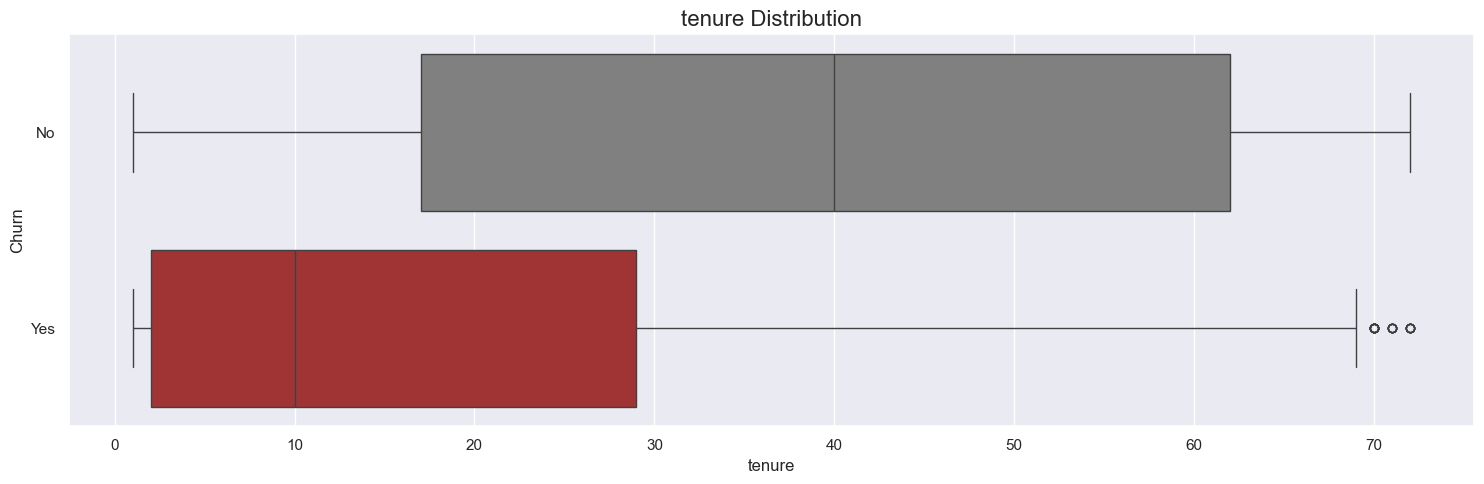

,count,mean,std,min,25%,50%,75%,max,IQR
Churn,,,,,,,,,
No,4938.0,38.872620,23.878867,1.0,17.0,40.0,62.0,72.0,45.0
Yes,1861.0,18.030629,19.556195,1.0,2.0,10.0,29.0,72.0,27.0


In [218]:
plot_box_churn(df, 'tenure')

Sebagian besar pelanggan yang berhenti berlangganan ternyata masih “baru”, dengan lama berlangganan hanya sekitar 10 bulan. *Artinya, risiko churn paling tinggi ada di tahun pertama.* Untuk mengatasinya, perusahaan dapat menyiapkan program khusus pelanggan baru seperti diskon bulan pertama, bonus layanan tambahan, atau penawaran upgrade kontrak tahunan.

Revisi: 
Iya, terdapat perbedaan antara ... . Orang2 yang churn nih punya rentang yang kecil nih, antara ... s/d ... .

Notes:
Konsistensi terms of variable. Biar lebih strict.

#### 2.5.2 Apakah terdapat perbedaan total charges yang churn dan tidak churn ?


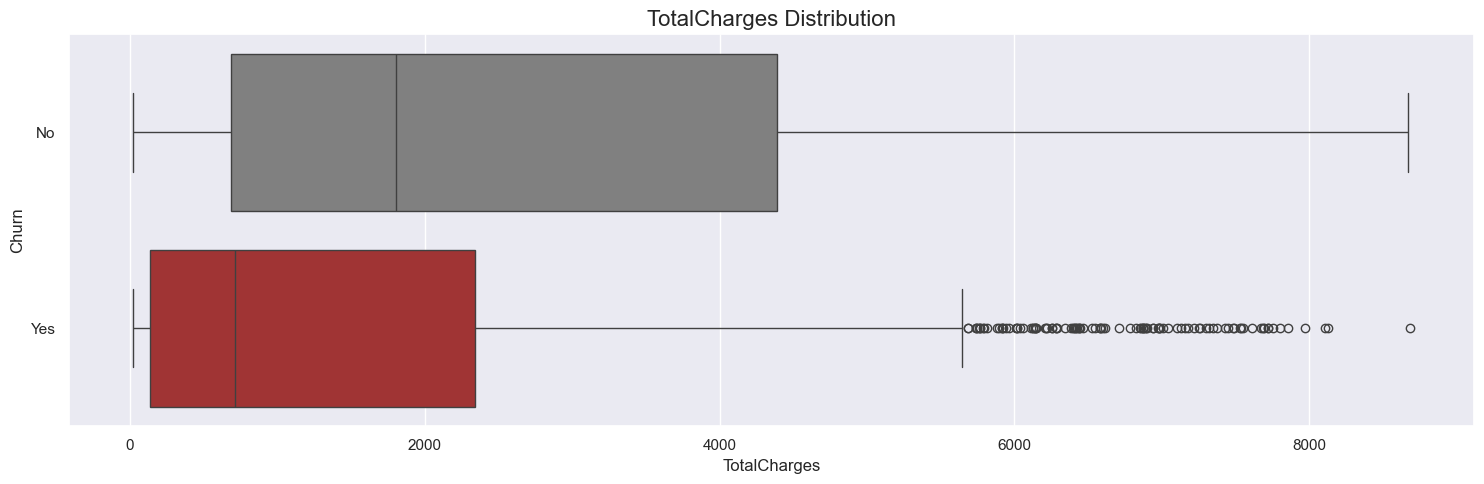

,count,mean,std,min,25%,50%,75%,max,IQR
Churn,,,,,,,,,
No,4938.0,2655.957493,2331.711899,18.85,688.625,1802.35,4392.2375,8672.45,3703.6125
Yes,1861.0,1537.272810,1893.004442,18.85,134.500,712.85,2342.2000,8684.80,2207.7000


In [219]:
plot_box_churn(df, 'TotalCharges')

Sebagian besar pelanggan yang berhenti berlangganan memiliki total pengeluaran yang jauh lebih rendah (hanya sekitar $713), dibandingkan pelanggan yang tetap bertahan (hanya sekitar $1800). Hal ini menunjukkan bahwa risiko churn lebih tinggi pada pelanggan dengan kontribusi nilai yang masih kecil. Perusahaan dapat menyiapkan strategi retensi khusus segmen low-value seperti paket bundling murah, bonus layanan tambahan, atau insentif penggunaan awal agar pelanggan meningkatkan keterlibatan dan bertahan lebih lama. Langkah ini berpotensi mengurangi churn pada pelanggan bernilai rendah.

#### 2.5.3 Apakah terdapat perbedaan monthly charges antara yang churn dan tidak churn ?


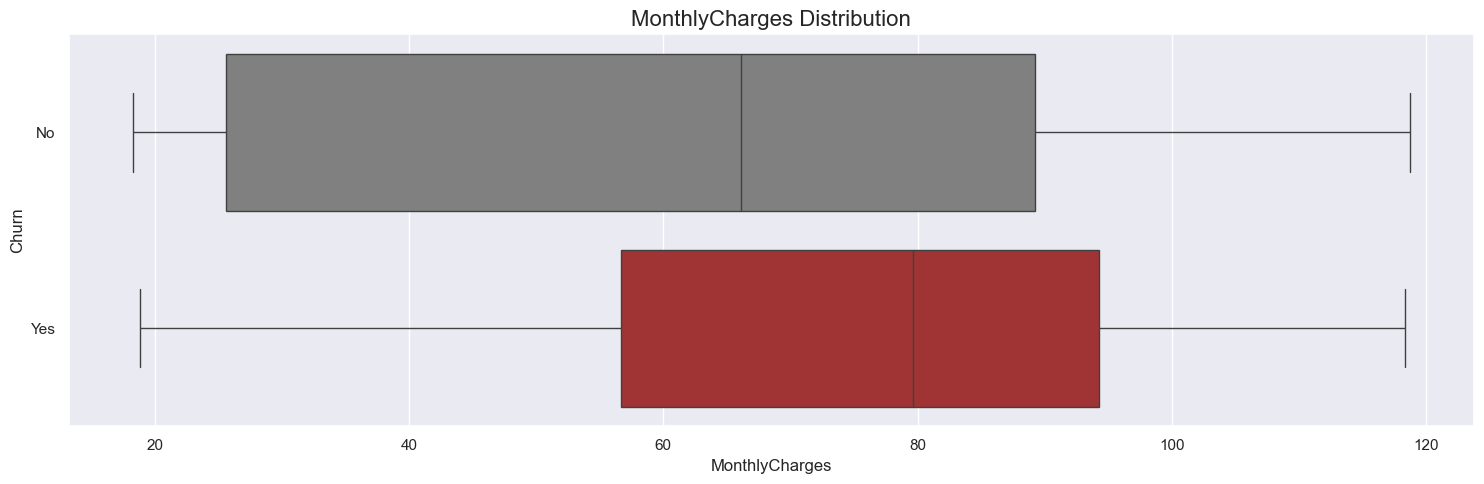

,count,mean,std,min,25%,50%,75%,max,IQR
Churn,,,,,,,,,
No,4938.0,62.676387,30.848467,18.25,25.60,66.125,89.25,118.75,63.65
Yes,1861.0,74.573267,24.563471,18.85,56.65,79.650,94.25,118.35,37.60


In [220]:
plot_box_churn(df, 'MonthlyCharges')

Sebagian besar pelanggan yang berhenti berlangganan memiliki biaya bulanan yang lebih tinggi, (sekitar $80/bulan), dibandingkan pelanggan yang bertahan (sekitar $66/bulan). Hal ini menunjukkan bahwa risiko churn meningkat pada pelanggan dengan tagihan bulanan tinggi, kemungkinan karena persepsi biaya yang terlalu mahal. Perusahaan dapat menyiapkan strategi retensi berbasis harga, seperti paket bundling hemat, diskon loyalitas, atau opsi downgrade ke paket yang lebih sesuai kebutuhan.

#### 2.5.4 Bagaimana perbedaan tingkat churn antara gender ?

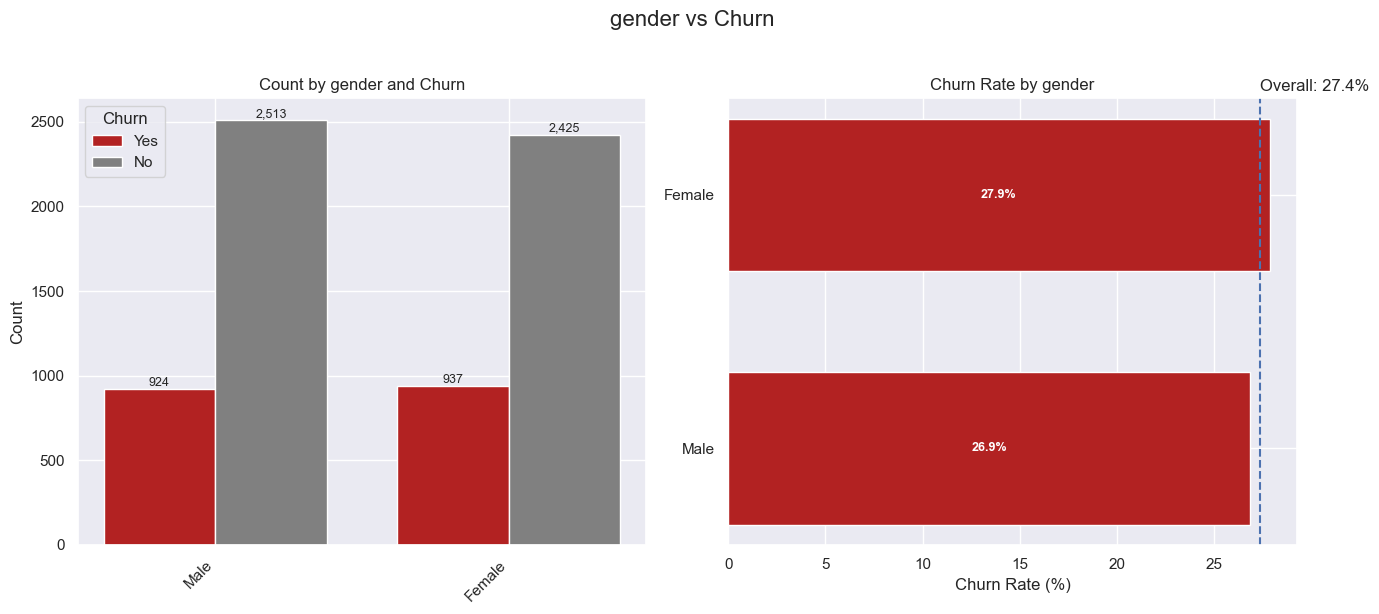

Churn,Yes,No,Yes (%),No (%)
gender,,,,
Female,937,2425,27.9%,72.1%
Male,924,2513,26.9%,73.1%


Churn,Yes,No,Yes (%),No (%)
gender,,,,
Female,937,2425,27.9%,72.1%
Male,924,2513,26.9%,73.1%


In [221]:
plot_stacked_bar_churn_subplot(df, 'gender')

Tingkat churn relatif sama antara pelanggan pria (26,9%) dan wanita (27,9%). Hal ini menunjukkan bahwa jenis kelamin tidak menjadi faktor pembeda utama dalam risiko churn. Perusahaan dapat lebih memfokuskan strategi retensi pada faktor lain yang lebih berpengaruh, seperti lama berlangganan (tenure), total pembayaran, atau besarnya biaya bulanan, daripada membedakan program berdasarkan gender.

Notes: Usahakan churn di kiri, dan not churn di kanan.
Kalau vertikal, churn di atas, dan not churn di bawah.

Subplot: kiri group barchart (descending vertikal), kanan churn rate (horizontal).

#### 2.5.5 Bagaimana perbedaan tingkat churn berdasarkan senior citizen ?


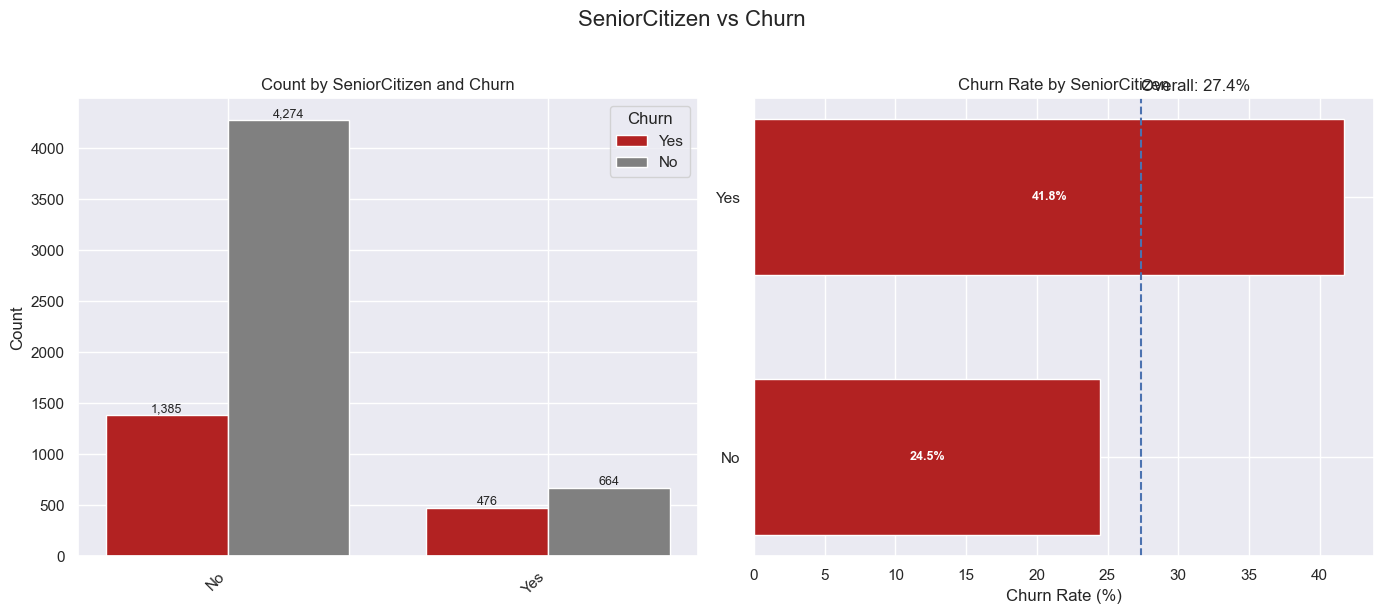

Churn,Yes,No,Yes (%),No (%)
SeniorCitizen,,,,
No,1385,4274,24.5%,75.5%
Yes,476,664,41.8%,58.2%


Churn,Yes,No,Yes (%),No (%)
SeniorCitizen,,,,
No,1385,4274,24.5%,75.5%
Yes,476,664,41.8%,58.2%


In [222]:
# Mapping Column SeniorCitizen
df['SeniorCitizen'] = df['SeniorCitizen'].map({1: 'Yes', 0: 'No'})
plot_stacked_bar_churn_subplot(df, 'SeniorCitizen')

Pelanggan yang termasuk kategori senior citizen memiliki tingkat churn yang jauh lebih tinggi, yaitu 41,8%, dibandingkan dengan pelanggan non-senior yang hanya 24,5%. Hal ini menunjukkan bahwa pelanggan lanjut usia lebih rentan berhenti berlangganan, kemungkinan karena faktor keterbatasan penggunaan teknologi atau persepsi biaya yang tidak sebanding dengan manfaat. Perusahaan dapat menyiapkan program retensi khusus untuk segmen senior, misalnya memberikan paket sederhana dengan harga terjangkau, panduan penggunaan layanan yang lebih mudah dipahami, atau dukungan teknis yang lebih proaktif.

Revisi tabel:
Kolom: Count Total, Count Churn, Churn Rate (Churn Percentage). Baris tetap sesuai.

#### 2.5.6 Bagaimana perbedaan tingkat churn antara partner ?


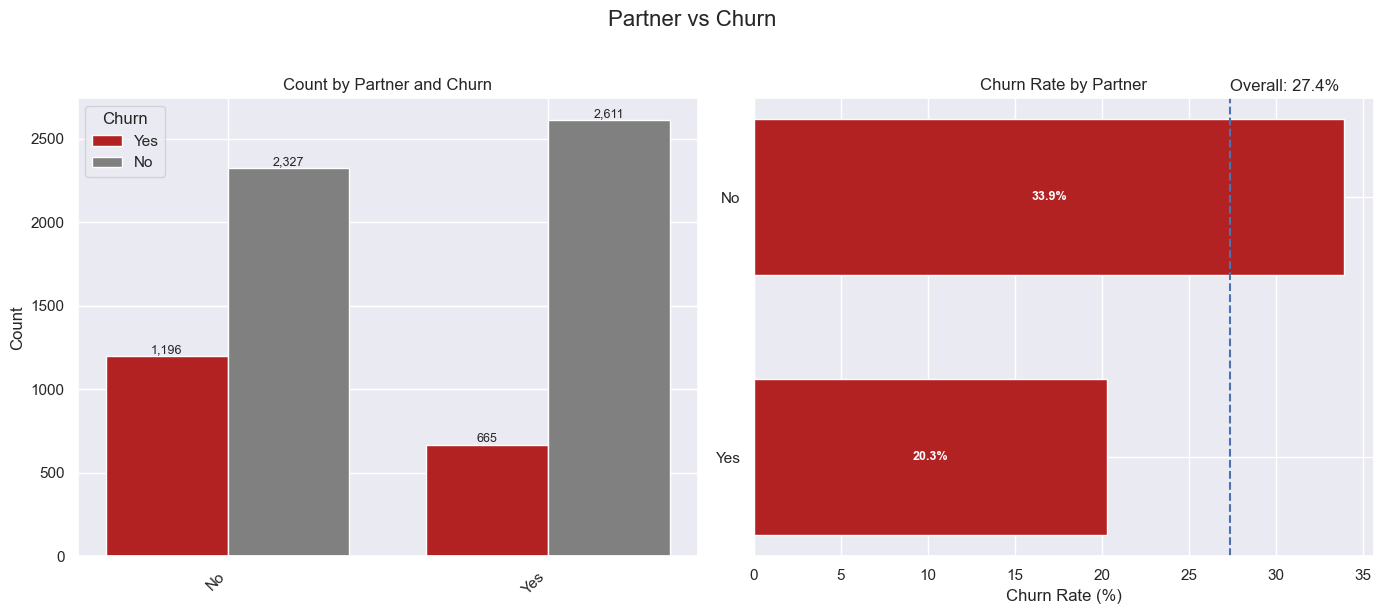

Churn,Yes,No,Yes (%),No (%)
Partner,,,,
No,1196,2327,33.9%,66.1%
Yes,665,2611,20.3%,79.7%


Churn,Yes,No,Yes (%),No (%)
Partner,,,,
No,1196,2327,33.9%,66.1%
Yes,665,2611,20.3%,79.7%


In [223]:
plot_stacked_bar_churn_subplot(df, 'Partner')

Pelanggan yang tidak memiliki pasangan memiliki tingkat churn yang lebih tinggi, yaitu 33,9%, dibandingkan dengan pelanggan yang memiliki pasangan sebesar 20,3%. Hal ini menunjukkan bahwa pelanggan tanpa pasangan cenderung lebih rentan berhenti berlangganan, kemungkinan karena keterikatan sosial dan kebutuhan layanan yang lebih rendah Perusahaan dapat menyiapkan program retensi khusus untuk pelanggan tanpa pasangan, misalnya penawaran paket bundling dengan harga lebih terjangkau atau bonus layanan tambahan yang menambah nilai penggunaan.

#### 2.5.7 Bagaimana perbedaan tingkat churn antara dependents ?


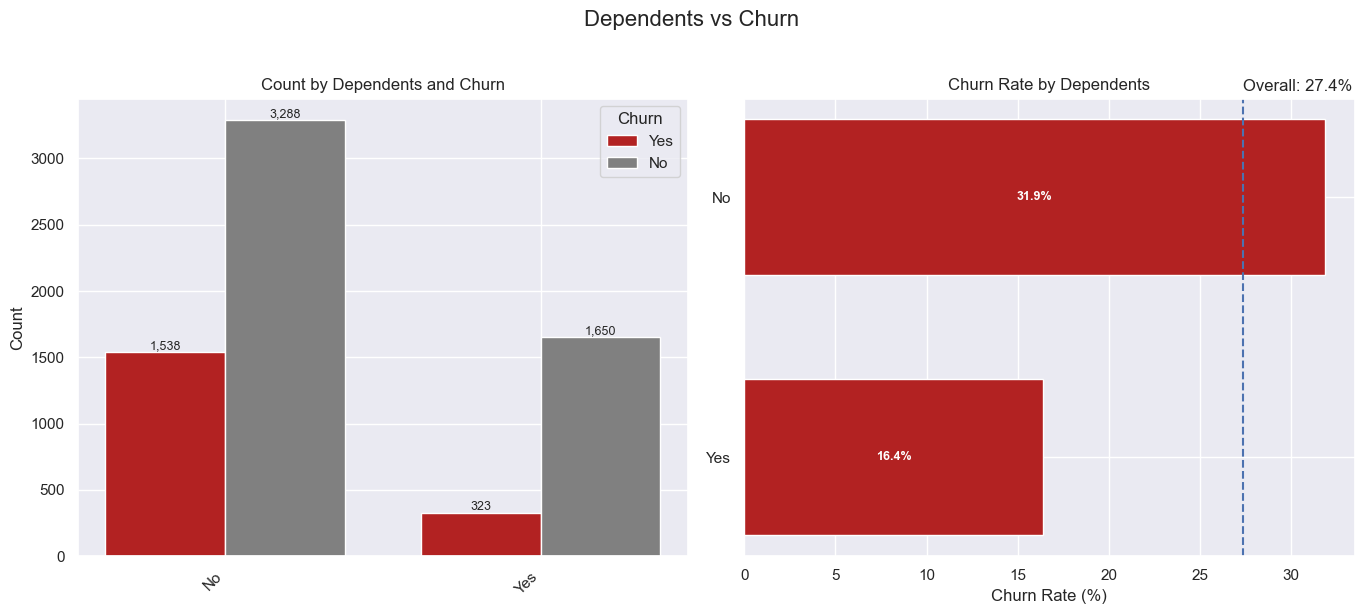

Churn,Yes,No,Yes (%),No (%)
Dependents,,,,
No,1538,3288,31.9%,68.1%
Yes,323,1650,16.4%,83.6%


Churn,Yes,No,Yes (%),No (%)
Dependents,,,,
No,1538,3288,31.9%,68.1%
Yes,323,1650,16.4%,83.6%


In [224]:
plot_stacked_bar_churn_subplot(df, 'Dependents')

Pelanggan yang tidak memiliki tanggungan memiliki tingkat churn yang lebih tinggi, yaitu 31,9%, dibandingkan dengan pelanggan yang memiliki tanggungan sebesar 16,4%. Hal ini menunjukkan bahwa pelanggan tanpa tanggungan lebih berisiko untuk berhenti berlangganan, kemungkinan karena kebutuhan layanan yang lebih rendah atau fleksibilitas untuk berpindah ke penyedia lain. Perusahaan dapat menyiapkan strategi retensi khusus bagi pelanggan tanpa tanggungan, seperti penawaran paket hemat, insentif loyalitas individu, atau program referral agar mereka merasa mendapatkan manfaat tambahan dari tetap berlangganan. Pendekatan ini dapat membantu mengurangi churn pada segmen pelanggan yang cenderung kurang terikat secara keluarga.

#### 2.5.8 Bagaimanakah tingkat churn berbeda berdasarkan phone service ?


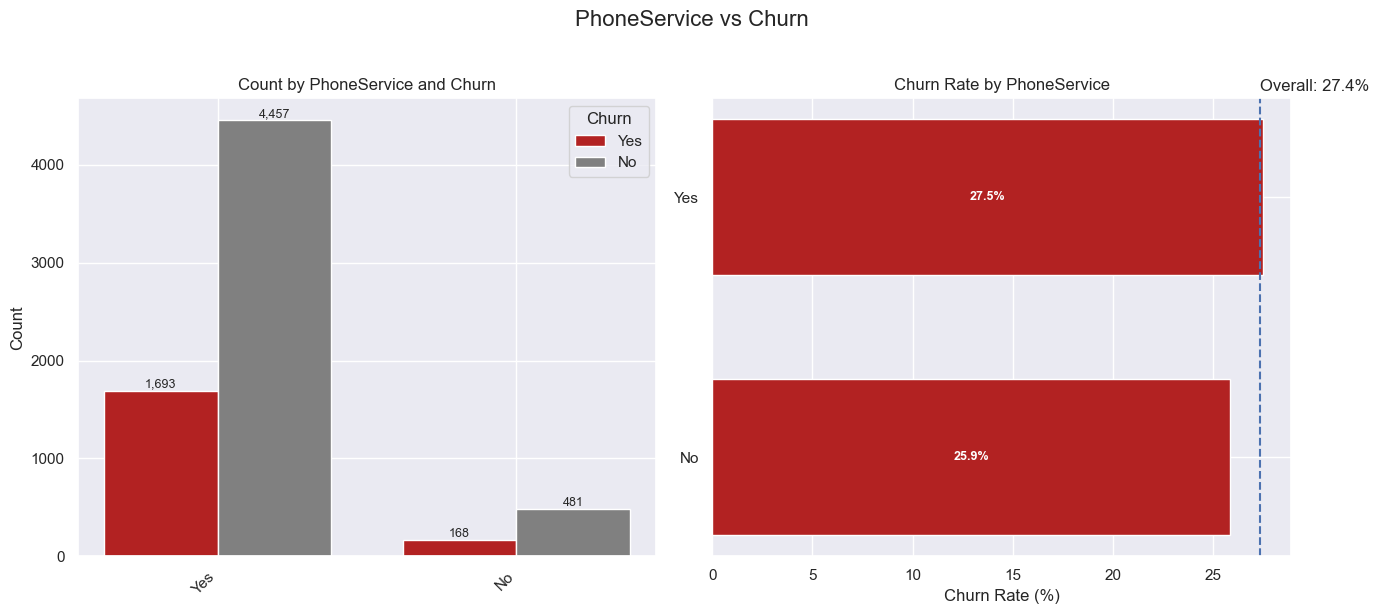

Churn,Yes,No,Yes (%),No (%)
PhoneService,,,,
No,168,481,25.9%,74.1%
Yes,1693,4457,27.5%,72.5%


Churn,Yes,No,Yes (%),No (%)
PhoneService,,,,
No,168,481,25.9%,74.1%
Yes,1693,4457,27.5%,72.5%


In [225]:
plot_stacked_bar_churn_subplot(df, 'PhoneService')

Tingkat churn relatif sama antara pelanggan yang memiliki layanan telepon (27,5%) dan yang tidak memiliki layanan telepon (25,9%). Hal ini menunjukkan bahwa kepemilikan layanan telepon bukanlah faktor utama yang membedakan risiko churn. Perusahaan dapat lebih memfokuskan strategi retensi pada faktor lain yang memiliki dampak lebih kuat, seperti jenis kontrak, biaya bulanan, atau layanan tambahan (misalnya internet dan proteksi perangkat), dibandingkan menjadikan layanan telepon sebagai prioritas intervensi.

#### 2.5.9 Bagaimanakah tingkat churn berbeda berdasarkan multiple lines ?


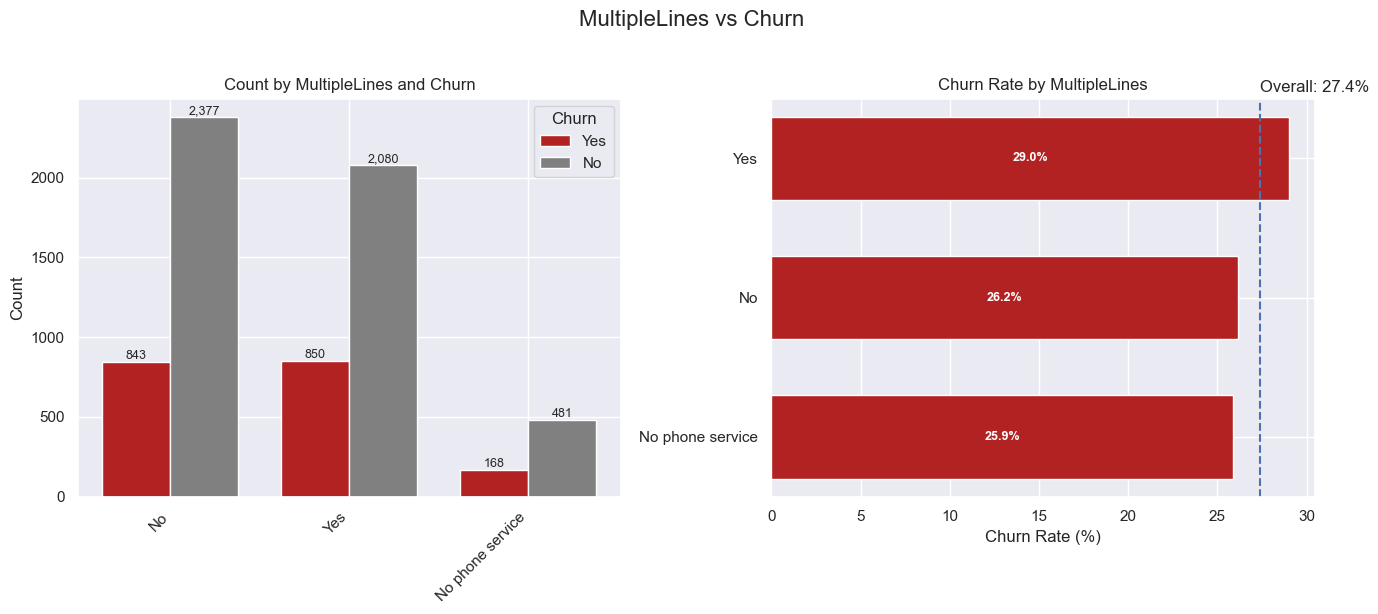

Churn,Yes,No,Yes (%),No (%)
MultipleLines,,,,
No,843,2377,26.2%,73.8%
No phone service,168,481,25.9%,74.1%
Yes,850,2080,29.0%,71.0%


Churn,Yes,No,Yes (%),No (%)
MultipleLines,,,,
No,843,2377,26.2%,73.8%
No phone service,168,481,25.9%,74.1%
Yes,850,2080,29.0%,71.0%


In [226]:
plot_stacked_bar_churn_subplot(df, 'MultipleLines')

Pelanggan dengan lebih dari satu saluran telepon memiliki tingkat churn sedikit lebih tinggi (29,0%) dibandingkan dengan pelanggan dengan satu saluran (26,2%) maupun tanpa layanan telepon (25,9%). Hal ini menunjukkan bahwa penggunaan banyak saluran telepon tidak otomatis meningkatkan loyalitas, bahkan justru terkait dengan risiko churn yang lebih besar, kemungkinan karena biaya tambahan atau kebutuhan layanan yang tidak terpenuhi. Perusahaan dapat menyiapkan strategi retensi untuk pelanggan multi-line, seperti paket bundling hemat untuk beberapa saluran, diskon tambahan, atau layanan nilai tambah yang relevan.

#### 2.5.10 Bagaimanakah tingkat churn berbeda berdasarkan internet service ?


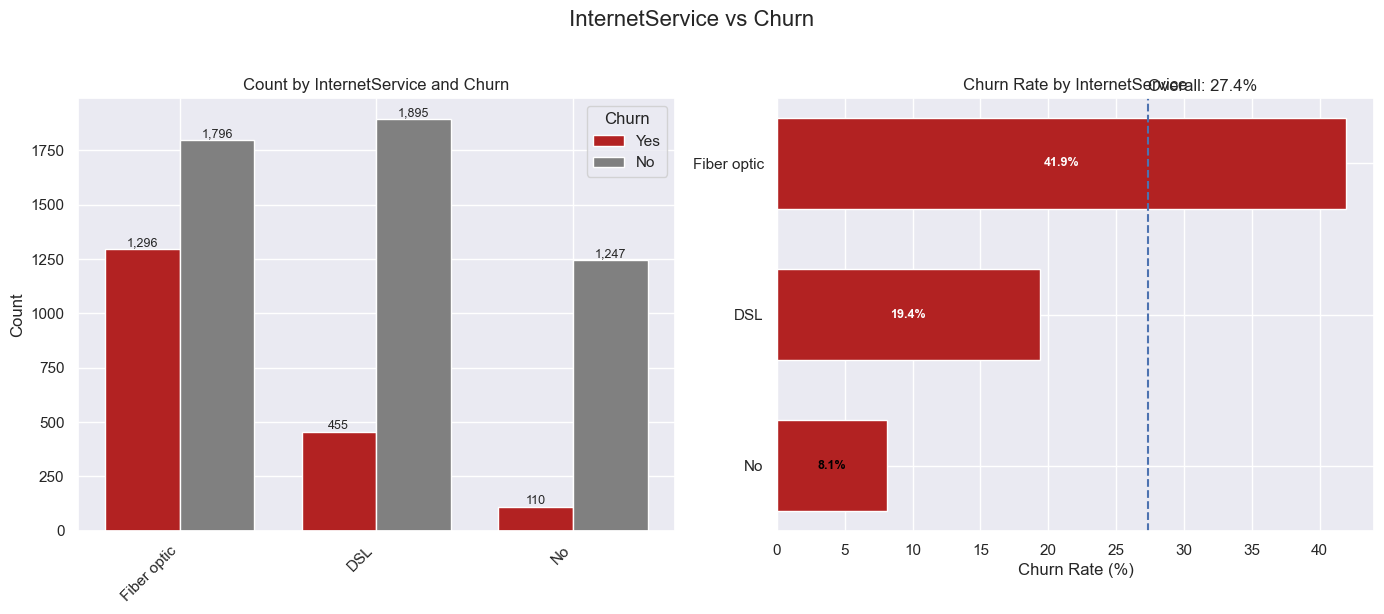

Churn,Yes,No,Yes (%),No (%)
InternetService,,,,
DSL,455,1895,19.4%,80.6%
Fiber optic,1296,1796,41.9%,58.1%
No,110,1247,8.1%,91.9%


Churn,Yes,No,Yes (%),No (%)
InternetService,,,,
DSL,455,1895,19.4%,80.6%
Fiber optic,1296,1796,41.9%,58.1%
No,110,1247,8.1%,91.9%


In [227]:
plot_stacked_bar_churn_subplot(df, 'InternetService')

Pelanggan pengguna fiber optic memiliki tingkat churn paling tinggi yaitu 41,9%, jauh lebih besar dibandingkan pengguna DSL (19,4%) maupun pelanggan tanpa layanan internet (8,1%). Hal ini menunjukkan bahwa meskipun fiber optic adalah layanan dengan kualitas lebih tinggi, pelanggan justru lebih rentan churn, kemungkinan karena biaya bulanan yang lebih mahal atau ekspektasi layanan yang tidak terpenuhi. Perusahaan dapat menyiapkan strategi retensi khusus untuk pelanggan fiber optic, seperti memberikan opsi paket dengan harga lebih kompetitif, peningkatan kualitas layanan, atau benefit tambahan (misalnya kuota streaming gratis).

#### 2.5.11 Bagaimanakah tingkat churn berbeda berdasarkan online security ?


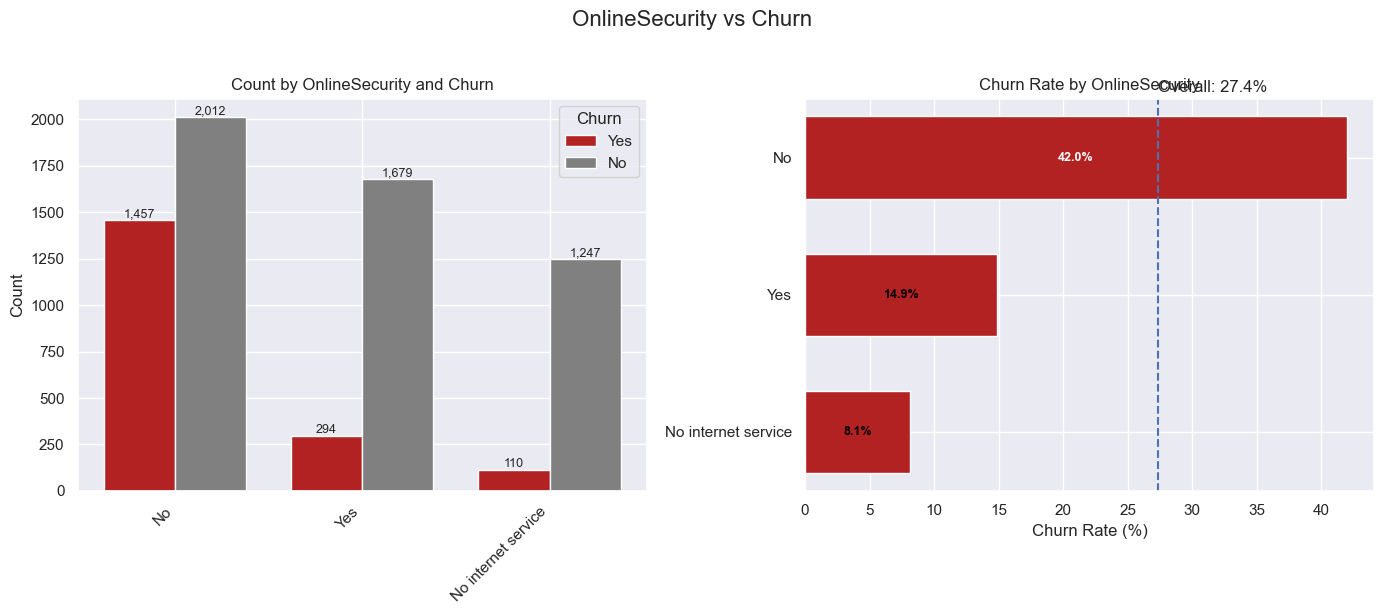

Churn,Yes,No,Yes (%),No (%)
OnlineSecurity,,,,
No,1457,2012,42.0%,58.0%
No internet service,110,1247,8.1%,91.9%
Yes,294,1679,14.9%,85.1%


Churn,Yes,No,Yes (%),No (%)
OnlineSecurity,,,,
No,1457,2012,42.0%,58.0%
No internet service,110,1247,8.1%,91.9%
Yes,294,1679,14.9%,85.1%


In [228]:
plot_stacked_bar_churn_subplot(df, 'OnlineSecurity')

Pelanggan yang tidak menggunakan layanan keamanan online memiliki tingkat churn sangat tinggi, yaitu 42,0%, dibandingkan dengan pelanggan yang menggunakan layanan ini (14,9%) maupun yang tidak memiliki internet sama sekali (8,1%). Hal ini menunjukkan bahwa keberadaan layanan keamanan online berperan penting dalam menurunkan risiko churn, kemungkinan karena pelanggan merasa lebih terlindungi dan nyaman dalam penggunaan internet. Perusahaan dapat menyiapkan strategi retensi berbasis bundling layanan keamanan, misalnya menawarkan paket internet yang sudah termasuk proteksi online dengan harga terjangkau atau memberikan masa percobaan gratis untuk fitur keamanan.

#### 2.5.12 Bagaimanakah tingkat churn berbeda berdasarkan online backup ?


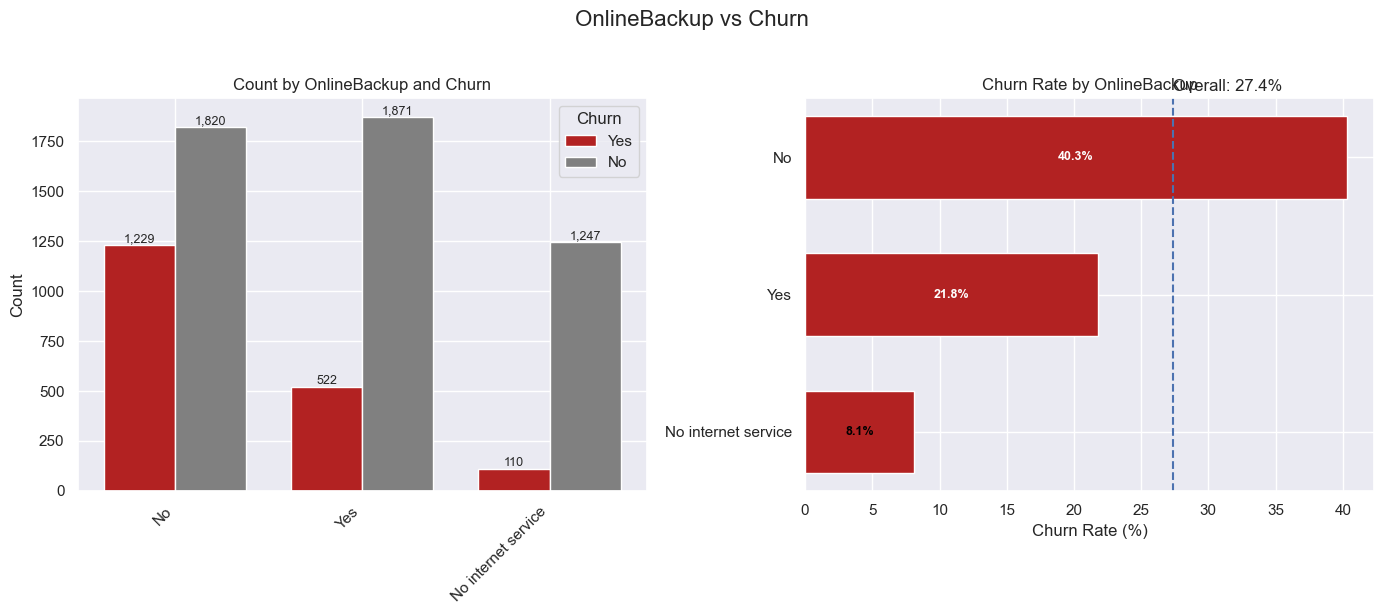

Churn,Yes,No,Yes (%),No (%)
OnlineBackup,,,,
No,1229,1820,40.3%,59.7%
No internet service,110,1247,8.1%,91.9%
Yes,522,1871,21.8%,78.2%


Churn,Yes,No,Yes (%),No (%)
OnlineBackup,,,,
No,1229,1820,40.3%,59.7%
No internet service,110,1247,8.1%,91.9%
Yes,522,1871,21.8%,78.2%


In [229]:
plot_stacked_bar_churn_subplot(df, 'OnlineBackup')

Pelanggan yang tidak menggunakan layanan backup online memiliki tingkat churn tinggi, yaitu 40,3%, dibandingkan dengan pelanggan yang berlangganan layanan ini (21,8%) maupun yang tidak memiliki internet (8,1%). Hal ini menunjukkan bahwa layanan backup online berkontribusi pada peningkatan loyalitas pelanggan, kemungkinan karena memberikan rasa aman terhadap data dan menambah nilai pada langganan internet. Perusahaan dapat menyiapkan strategi retensi dengan mendorong adopsi layanan backup, misalnya melalui paket bundling internet + backup, promo harga khusus, atau uji coba gratis selama periode tertentu.

#### 2.5.13 Bagaimanakah tingkat churn berbeda berdasarkan device protection ?


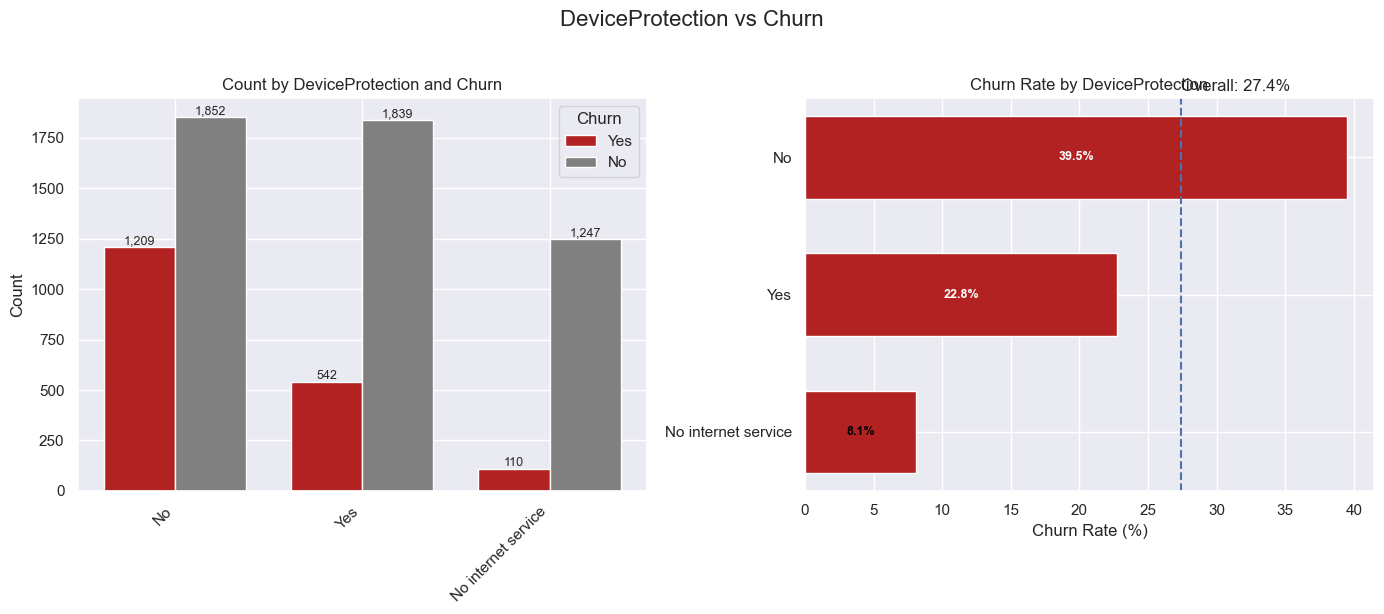

Churn,Yes,No,Yes (%),No (%)
DeviceProtection,,,,
No,1209,1852,39.5%,60.5%
No internet service,110,1247,8.1%,91.9%
Yes,542,1839,22.8%,77.2%


Churn,Yes,No,Yes (%),No (%)
DeviceProtection,,,,
No,1209,1852,39.5%,60.5%
No internet service,110,1247,8.1%,91.9%
Yes,542,1839,22.8%,77.2%


In [230]:
plot_stacked_bar_churn_subplot(df, 'DeviceProtection')

Pelanggan yang tidak menggunakan layanan proteksi perangkat memiliki tingkat churn tinggi, yaitu 39,5%, dibandingkan dengan pelanggan yang menggunakan layanan ini (22,8%) maupun yang tidak memiliki internet (8,1%). Hal ini menunjukkan bahwa proteksi perangkat dapat membantu meningkatkan loyalitas pelanggan, kemungkinan karena memberikan rasa aman terhadap risiko kerusakan perangkat. Perusahaan dapat menyiapkan strategi retensi dengan memperluas adopsi layanan proteksi perangkat, misalnya melalui bundling dengan paket internet, promo harga khusus, atau edukasi manfaat proteksi perangkat.

#### 2.5.14 Bagaimanakah tingkat churn berbeda berdasarkan tech support ?


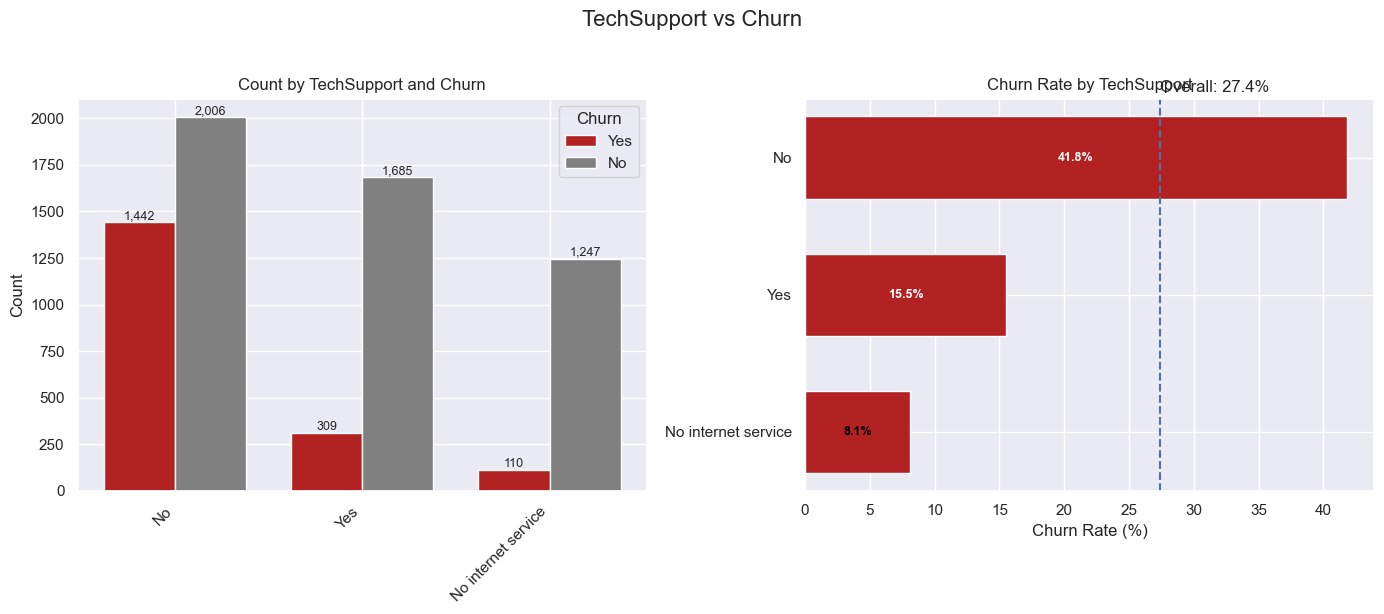

Churn,Yes,No,Yes (%),No (%)
TechSupport,,,,
No,1442,2006,41.8%,58.2%
No internet service,110,1247,8.1%,91.9%
Yes,309,1685,15.5%,84.5%


Churn,Yes,No,Yes (%),No (%)
TechSupport,,,,
No,1442,2006,41.8%,58.2%
No internet service,110,1247,8.1%,91.9%
Yes,309,1685,15.5%,84.5%


In [231]:
plot_stacked_bar_churn_subplot(df, 'TechSupport')

Pelanggan yang tidak menggunakan layanan dukungan teknis memiliki tingkat churn tinggi, yaitu 41,8%, dibandingkan dengan pelanggan yang menggunakan layanan ini (15,5%) maupun yang tidak memiliki internet (8,1%). Hal ini menunjukkan bahwa layanan dukungan teknis berperan penting dalam menekan risiko churn, kemungkinan karena pelanggan merasa lebih terbantu ketika menghadapi masalah teknis. Perusahaan dapat menyiapkan strategi retensi dengan memperluas pemakaian layanan dukungan teknis, misalnya memberikan paket bundling internet + tech support, menawarkan masa uji coba gratis, atau menyediakan akses cepat ke tim support premium.

#### 2.5.15 Bagaimanakah tingkat churn berbeda berdasarkan streaming tv ?


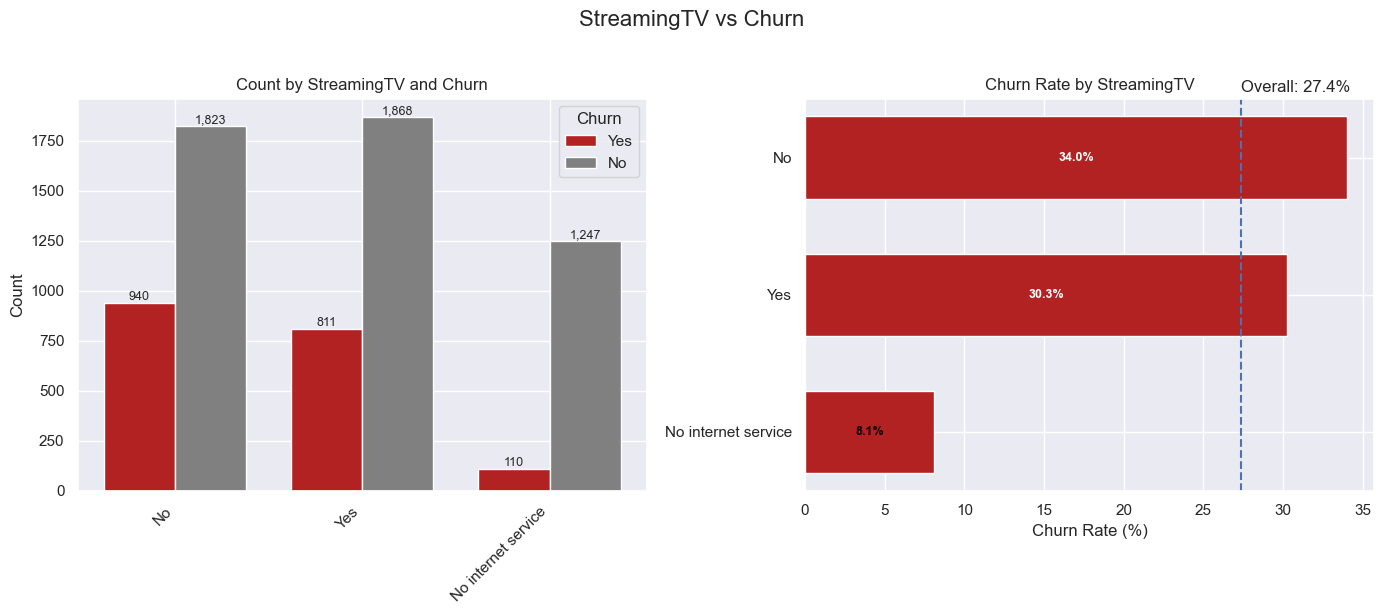

Churn,Yes,No,Yes (%),No (%)
StreamingTV,,,,
No,940,1823,34.0%,66.0%
No internet service,110,1247,8.1%,91.9%
Yes,811,1868,30.3%,69.7%


Churn,Yes,No,Yes (%),No (%)
StreamingTV,,,,
No,940,1823,34.0%,66.0%
No internet service,110,1247,8.1%,91.9%
Yes,811,1868,30.3%,69.7%


In [232]:
plot_stacked_bar_churn_subplot(df, 'StreamingTV')

Tingkat churn relatif tinggi baik pada pelanggan yang menggunakan layanan streaming TV (30,3%) maupun yang tidak menggunakannya (34,0%), sedangkan pelanggan tanpa layanan internet memiliki churn jauh lebih rendah (8,1%). Hal ini menunjukkan bahwa penggunaan layanan streaming TV tidak memberikan perbedaan signifikan terhadap loyalitas pelanggan internet, sehingga faktor ini bukan pendorong utama churn. Perusahaan dapat lebih memfokuskan strategi retensi pada faktor yang lebih berpengaruh, seperti layanan keamanan online, dukungan teknis, atau jenis kontrak, dibandingkan menjadikan streaming TV sebagai prioritas intervensi.

#### 2.5.16 Bagaimanakah tingkat churn berbeda berdasarkan streaming movies ?


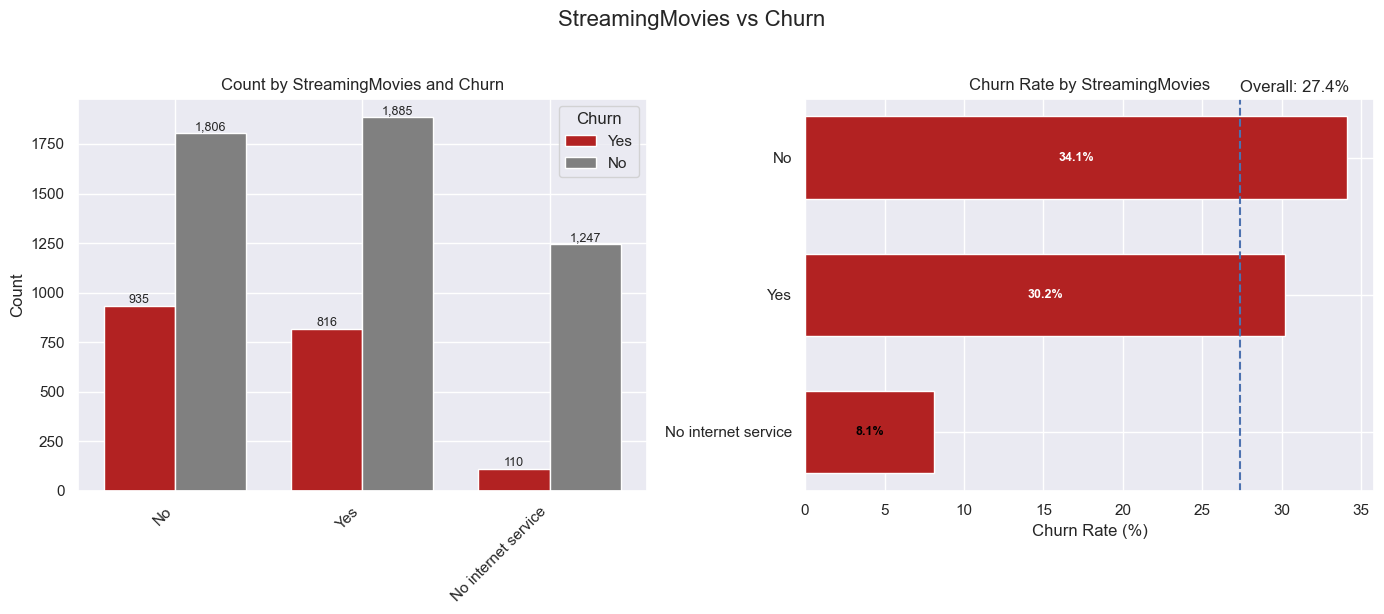

Churn,Yes,No,Yes (%),No (%)
StreamingMovies,,,,
No,935,1806,34.1%,65.9%
No internet service,110,1247,8.1%,91.9%
Yes,816,1885,30.2%,69.8%


Churn,Yes,No,Yes (%),No (%)
StreamingMovies,,,,
No,935,1806,34.1%,65.9%
No internet service,110,1247,8.1%,91.9%
Yes,816,1885,30.2%,69.8%


In [233]:
plot_stacked_bar_churn_subplot(df, 'StreamingMovies')

Tingkat churn relatif tinggi baik pada pelanggan yang menggunakan layanan streaming film (30,2%) maupun yang tidak menggunakannya (34,1%), sedangkan pelanggan tanpa internet memiliki churn jauh lebih rendah (8,1%). Hal ini menunjukkan bahwa keberadaan layanan streaming film tidak memberikan pengaruh signifikan terhadap loyalitas pelanggan internet. Perusahaan dapat lebih memfokuskan strategi retensi pada faktor lain yang lebih berpengaruh terhadap churn, seperti biaya bulanan, jenis kontrak, atau pemanfaatan layanan pendukung (misalnya keamanan online dan dukungan teknis), daripada menjadikan streaming film sebagai prioritas utama.

#### 2.5.17 Bagaimanakah tingkat churn berbeda berdasarkan kontrak ?


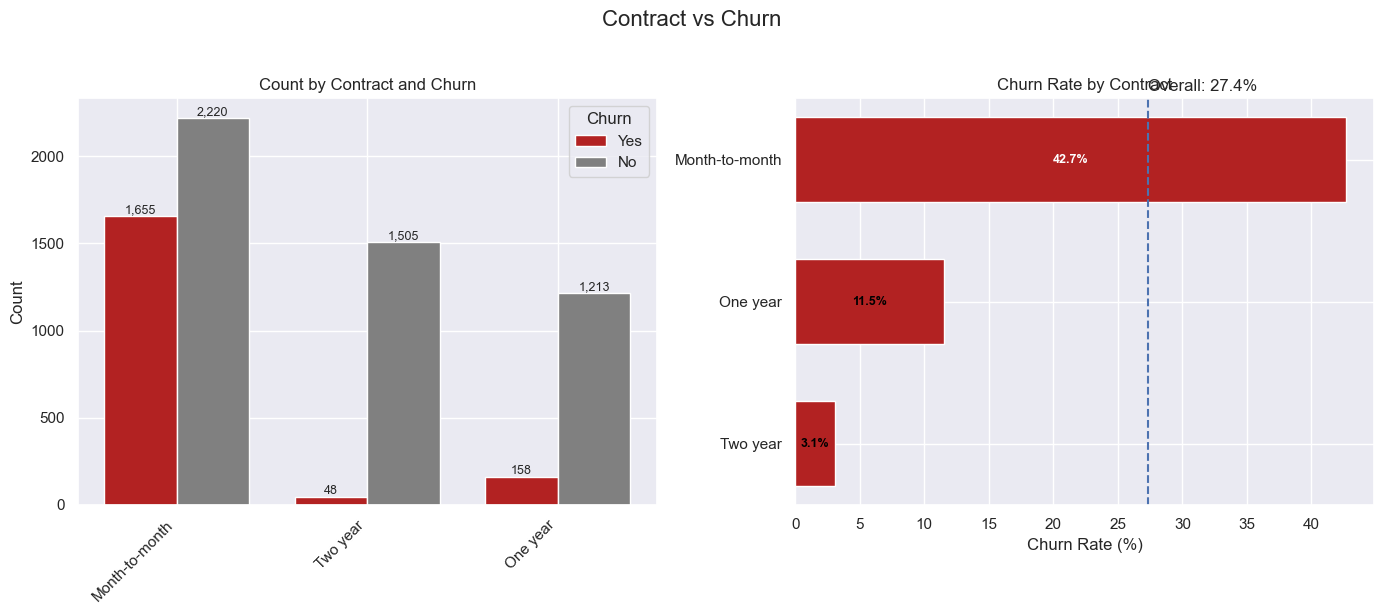

Churn,Yes,No,Yes (%),No (%)
Contract,,,,
Month-to-month,1655,2220,42.7%,57.3%
One year,158,1213,11.5%,88.5%
Two year,48,1505,3.1%,96.9%


Churn,Yes,No,Yes (%),No (%)
Contract,,,,
Month-to-month,1655,2220,42.7%,57.3%
One year,158,1213,11.5%,88.5%
Two year,48,1505,3.1%,96.9%


In [234]:
plot_stacked_bar_churn_subplot(df, 'Contract')

Pelanggan dengan kontrak bulanan memiliki tingkat churn sangat tinggi, yaitu 42,7%, dibandingkan dengan pelanggan kontrak satu tahun (11,5%) maupun dua tahun (3,1%). Hal ini menunjukkan bahwa jangka waktu kontrak berhubungan langsung dengan loyalitas, di mana semakin panjang kontrak, semakin kecil risiko churn. Perusahaan dapat menyiapkan strategi retensi dengan mendorong konversi pelanggan month-to-month ke kontrak tahunan atau dua tahunan, misalnya melalui diskon khusus, bonus layanan, atau insentif loyalitas. Langkah ini berpotensi signifikan menurunkan churn sekaligus meningkatkan stabilitas pendapatan jangka panjang.

#### 2.5.18 Bagaimanakah tingkat churn berbeda berdasarkan paperless billing ?


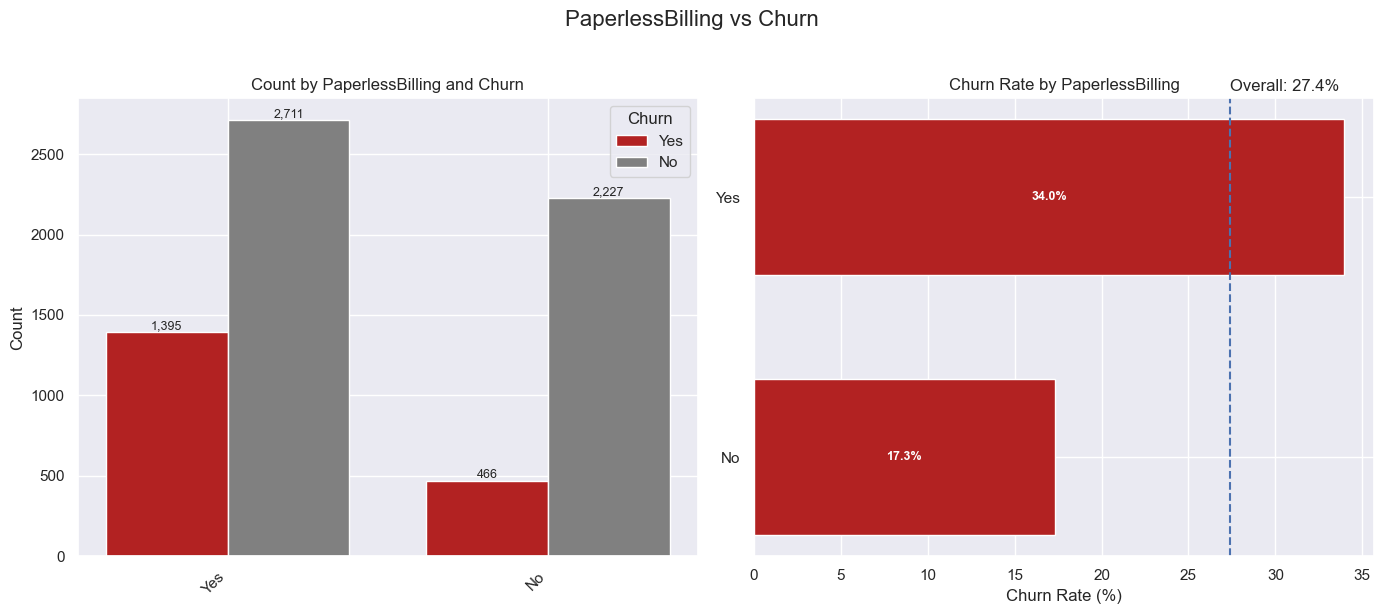

Churn,Yes,No,Yes (%),No (%)
PaperlessBilling,,,,
No,466,2227,17.3%,82.7%
Yes,1395,2711,34.0%,66.0%


Churn,Yes,No,Yes (%),No (%)
PaperlessBilling,,,,
No,466,2227,17.3%,82.7%
Yes,1395,2711,34.0%,66.0%


In [235]:
plot_stacked_bar_churn_subplot(df, 'PaperlessBilling')

Pelanggan yang menggunakan tagihan tanpa kertas (paperless billing) memiliki tingkat churn lebih tinggi, yaitu 34,0%, dibandingkan dengan pelanggan yang masih menggunakan tagihan fisik sebesar 17,3%. Hal ini menunjukkan bahwa meskipun paperless billing praktis, pelanggan dalam segmen ini justru lebih rentan berhenti berlangganan, kemungkinan karena profil mereka didominasi kontrak bulanan dengan pembayaran elektronik. Perusahaan dapat menyiapkan strategi retensi untuk pengguna paperless billing, misalnya memberikan insentif loyalitas, promo khusus pembayaran otomatis, atau edukasi tentang manfaat tambahan yang diperoleh dari sistem digital.

#### 2.5.19 Bagaimanakah tingkat churn berbeda berdasarkan payment method ?


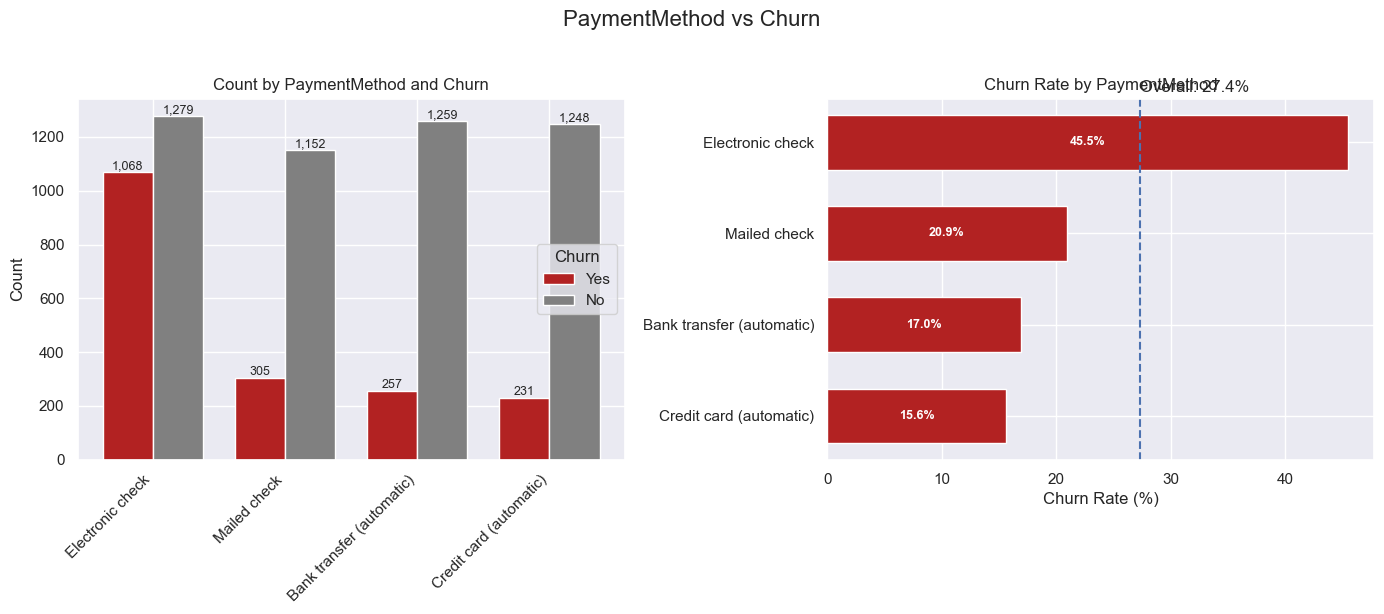

Churn,Yes,No,Yes (%),No (%)
PaymentMethod,,,,
Bank transfer (automatic),257,1259,17.0%,83.0%
Credit card (automatic),231,1248,15.6%,84.4%
Electronic check,1068,1279,45.5%,54.5%
Mailed check,305,1152,20.9%,79.1%


Churn,Yes,No,Yes (%),No (%)
PaymentMethod,,,,
Bank transfer (automatic),257,1259,17.0%,83.0%
Credit card (automatic),231,1248,15.6%,84.4%
Electronic check,1068,1279,45.5%,54.5%
Mailed check,305,1152,20.9%,79.1%


In [236]:
plot_stacked_bar_churn_subplot(df, 'PaymentMethod',
                               left_sort='churn_count_desc',
                               right_sort='rate_desc')


Pelanggan yang menggunakan metode pembayaran electronic check memiliki tingkat churn paling tinggi, yaitu 45,5%, dibandingkan dengan metode lain seperti mailed check (20,9%), bank transfer otomatis (17,0%), maupun kartu kredit otomatis (15,6%). Hal ini menunjukkan bahwa pelanggan yang membayar dengan electronic check cenderung lebih berisiko churn, kemungkinan karena profil mereka terkait kontrak bulanan atau preferensi pembayaran yang kurang stabil. Perusahaan dapat menyiapkan strategi retensi berbasis metode pembayaran, misalnya dengan mendorong pelanggan electronic check untuk beralih ke metode pembayaran otomatis (bank transfer/kartu kredit) melalui insentif diskon atau reward loyalitas.

### 2.6 Save Dataset

In [237]:
# Mapping Target
df['Churn'] = df['Churn'].map({1: 'Yes', 0: 'No'})

# Mapping Column SeniorCitizen
df['SeniorCitizen'] = df['SeniorCitizen'].map({1: 'Yes', 0: 'No'})

df.to_csv('../Data/Telco_Churn_clean_dataset.csv')

Tambahkan juga univariat di notebook. Wajib. Tampilkan boxplot dan histogram. Slide gak perlu tampilin tapi di notebook perlu.